<a href="https://colab.research.google.com/github/Theideabased/value_at_risk_ngx/blob/main/calculating_value_at_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALCULATING VALUE AT RISK

In [ ]:
!git clone https://github.com/Theideabased/value_at_risk_ngx.git

Cloning into 'value_at_risk_ngx'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 37 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 305.07 KiB | 331.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


The next code will import al the data that we have downloaded from the investing.com the it will make the Date format Day-Month-Year course in python the default format for date is Month-Day-Year.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [ ]:
directories = os.listdir('/content/value_at_risk_ngx/data')
directories

['GUINNES Historical Data.csv',
 'DANGCEM Historical Data.csv',
 'NB Historical Data.csv',
 'JBERGER Historical Data.csv',
 'README.md',
 'AIICO Historical Data.csv',
 'NESTLE Historical Data.csv',
 'ZENITHB Historical Data.csv',
 'UBA Historical Data.csv',
 'NSE All Share Historical Data (1).csv',
 'UNILEVE Historical Data.csv']

In [ ]:
aiico_data = pd.read_csv('/content/value_at_risk_ngx/data/AIICO Historical Data.csv', parse_dates=['Date'], dayfirst=True)
dangcem_data = pd.read_csv('/content/value_at_risk_ngx/data/DANGCEM Historical Data.csv', parse_dates=['Date'], dayfirst=True)
guiness_data = pd.read_csv('/content/value_at_risk_ngx/data/GUINNES Historical Data.csv', parse_dates=['Date'], dayfirst=True)
jberger_data = pd.read_csv('/content/value_at_risk_ngx/data/JBERGER Historical Data.csv', parse_dates=['Date'], dayfirst=True)
nestle_data = pd.read_csv('/content/value_at_risk_ngx/data/NESTLE Historical Data.csv', parse_dates=['Date'], dayfirst=True)
nse_all_data = pd.read_csv('/content/value_at_risk_ngx/data/NSE All Share Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
unilever_data = pd.read_csv('/content/value_at_risk_ngx/data/UNILEVE Historical Data.csv', parse_dates=['Date'], dayfirst=True)
zenith_data = pd.read_csv('/content/value_at_risk_ngx/data/ZENITHB Historical Data.csv', parse_dates=['Date'], dayfirst=True)
nb_data = pd.read_csv('/content/value_at_risk_ngx/data/NB Historical Data.csv', parse_dates=['Date'], dayfirst=True)
uba_data = pd.read_csv('/content/value_at_risk_ngx/data/UBA Historical Data.csv', parse_dates=['Date'], dayfirst=True)

In [ ]:
aiico_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-07-17,1.10,1.09,1.10,1.08,9.11M,0.92%
1,2024-07-16,1.09,1.15,1.15,1.08,15.88M,0.93%
2,2024-07-15,1.08,1.08,1.12,1.08,18.91M,0.00%
3,2024-07-12,1.08,1.12,1.10,1.07,14.61M,-3.57%
4,2024-07-11,1.12,1.10,1.12,1.09,15.63M,1.82%


Although for our analysis adjusted close prices is the best to use for variance covariance method as it put into consideration the dividends and stock split but since Nigerian stock does not have adjusted close prices we will have to use the normal close prices for our evaluation

In [ ]:
# Using the close price which is what we will use for the variance covariance cal
# Calculations
aiico_data['aiico'] = aiico_data['Price']
aiico_data_close = aiico_data[['Date', 'aiico']]
dangcem_data['dangcem'] = dangcem_data['Price']
guiness_data['guiness'] = guiness_data['Price']
jberger_data['jberger'] =  jberger_data['Price']
nestle_data['nestle'] = nestle_data['Price']
nse_all_data['nse_all'] = nse_all_data['Price']
unilever_data['unilever'] = unilever_data['Price']
zenith_data['zenith'] = zenith_data['Price']
nb_data['nb'] = nb_data['Price']
uba_data['uba'] = uba_data['Price']
aiico_data_close.head()

,Date,aiico
0,2024-07-17,1.10
1,2024-07-16,1.09
2,2024-07-15,1.08
3,2024-07-12,1.08
4,2024-07-11,1.12


For us to start our analysis we need to put all the data into one table so that it will be easy for analysis and we will be able to calculate all the datas in at once to avoid redundancy

In [ ]:
stock_close_data = pd.concat([aiico_data_close, dangcem_data['dangcem'],\
                              guiness_data['guiness'], jberger_data['jberger'],\
                              nestle_data['nestle'], nse_all_data['nse_all'],\
                              unilever_data['unilever'], zenith_data['zenith'],\
                              nb_data['nb'],uba_data['uba']], axis=1)
stock_close_data.set_index('Date', inplace=True)
stock_close_data.head()

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba
Date,,,,,,,,,,
2024-07-17,1.10,591.1,63.90,87.5,850,"99,976.70",17.95,40.00,29.95,23.85
2024-07-16,1.09,656.7,64.05,83.5,920,"100,075.59",17.30,40.00,29.50,23.00
2024-07-15,1.08,656.7,65.00,83.5,920,"99,971.64",17.30,39.00,29.50,22.85
2024-07-12,1.08,656.7,65.00,83.5,920,"99,671.28",17.20,37.05,29.70,22.75
2024-07-11,1.12,656.7,70.00,88.6,920,"99,468.90",17.10,37.10,29.70,23.00


some of the data are type string so we have to change it to float so that we will be able to make use it to calculate our value at risk effectively




In [ ]:
stock_close_data.dtypes[stock_close_data.dtypes == 'object']
stock_close_data.dropna()
stock_close_data['nestle'] = stock_close_data['nestle'].str.replace(',', '').astype(float)
stock_close_data['nse_all'] = stock_close_data['nse_all'].str.replace(',', '').astype(float)
# stock_close_data[['nestle, nse_all']] = stock_close_data[['nestle', 'nse_all']].astype(float)
stock_close_data.dtypes

,0
aiico,float64
dangcem,float64
guiness,float64
jberger,float64
nestle,float64
nse_all,float64
unilever,float64
zenith,float64
nb,float64
uba,float64


## Getting the Correlation matrix

In [ ]:
# Correlation matrix
# Calculate the correlation matrix
correlation_matrix = stock_close_data.corr()

# Display the correlation matrix
correlation_matrix.to_csv('correlation_matrix.csv')
correlation_matrix

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba
aiico,1.000000,0.528625,0.648093,0.790088,-0.401111,0.529560,0.239324,0.351256,0.294657,0.393139
dangcem,0.528625,1.000000,-0.087829,0.545551,0.033131,0.959381,-0.299849,0.788051,-0.342441,0.861623
guiness,0.648093,-0.087829,1.000000,0.469759,-0.369004,-0.066523,0.653404,-0.113441,0.706043,-0.176769
jberger,0.790088,0.545551,0.469759,1.000000,-0.638046,0.492666,0.155498,0.199067,0.302608,0.373821
nestle,-0.401111,0.033131,-0.369004,-0.638046,1.000000,0.051662,-0.131865,0.383054,-0.374467,0.140705
nse_all,0.529560,0.959381,-0.066523,0.492666,0.051662,1.000000,-0.390275,0.854248,-0.405732,0.897478
unilever,0.239324,-0.299849,0.653404,0.155498,-0.131865,-0.390275,1.000000,-0.244396,0.822740,-0.254187
zenith,0.351256,0.788051,-0.113441,0.199067,0.383054,0.854248,-0.244396,1.000000,-0.322305,0.895661
nb,0.294657,-0.342441,0.706043,0.302608,-0.374467,-0.405732,0.822740,-0.322305,1.000000,-0.343603
uba,0.393139,0.861623,-0.176769,0.373821,0.140705,0.897478,-0.254187,0.895661,-0.343603,1.000000


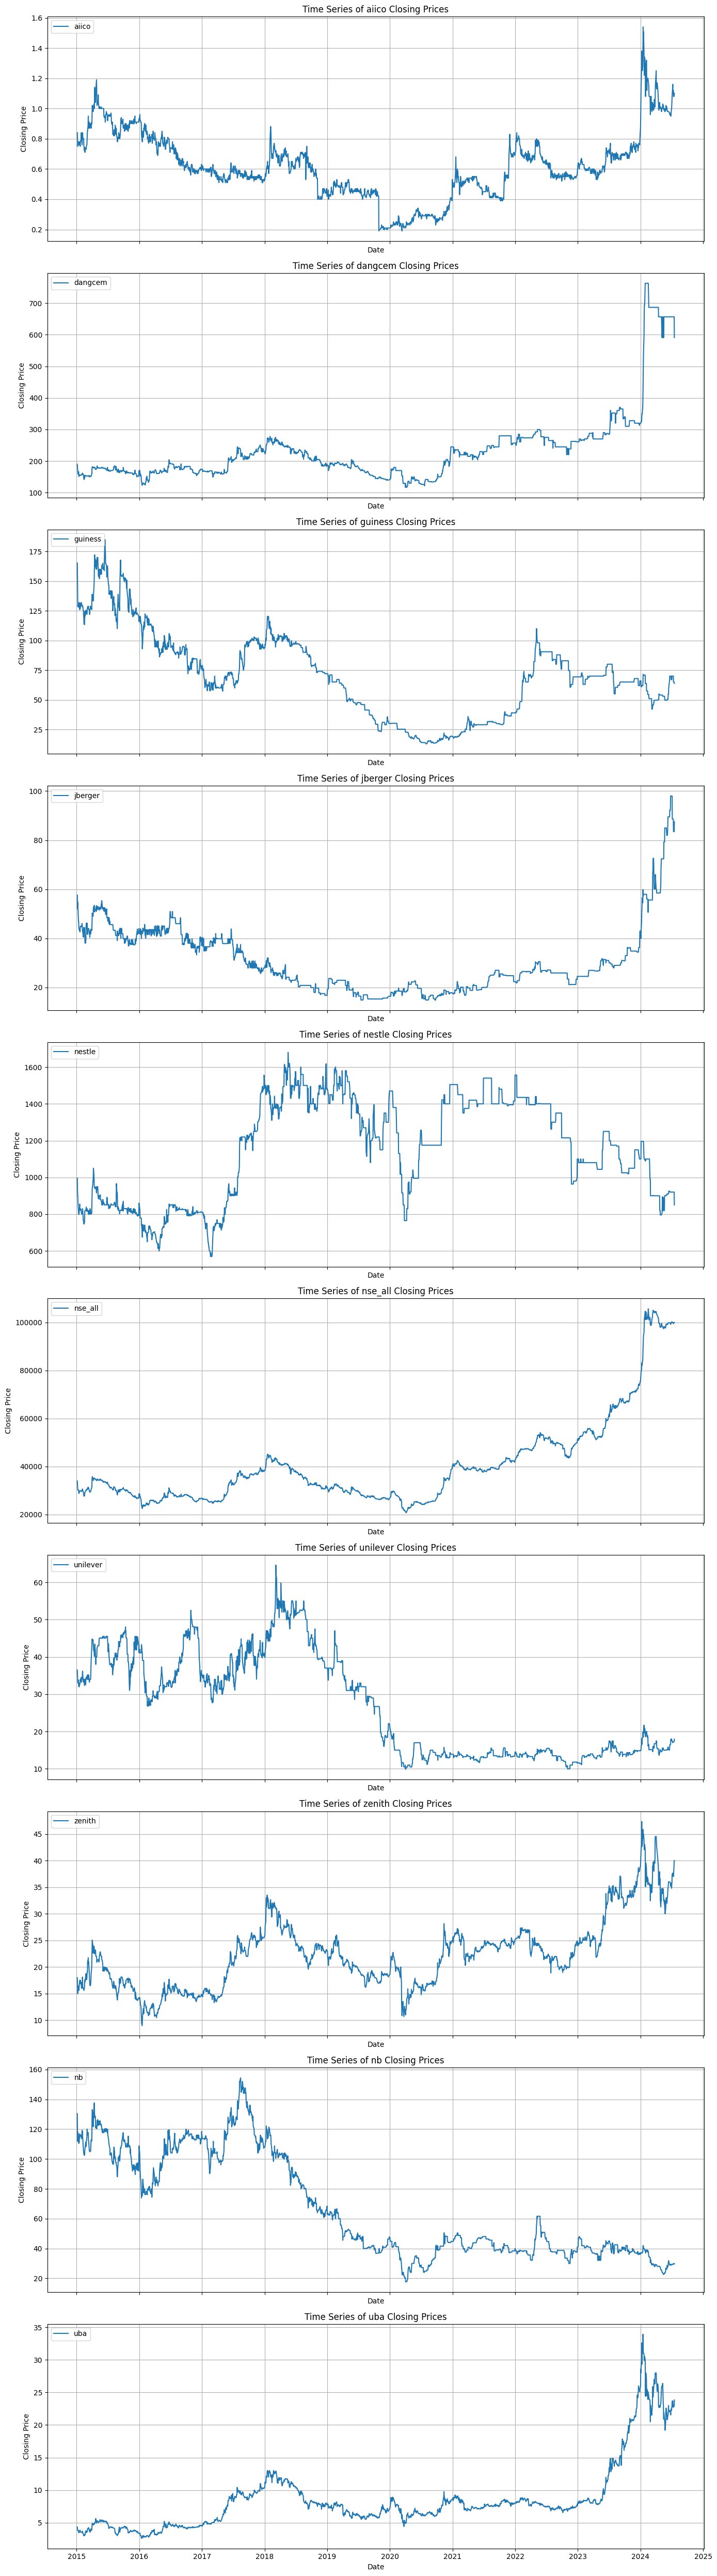

In [ ]:
# Assuming stock_close_data is your DataFrame and Date is the index
# If Date is not set as the index, you can set it using:
# stock_close_data.set_index('Date', inplace=True)

# Number of columns
num_columns = len(stock_close_data.columns)

# Creating subplots with a grid that can accommodate all plots
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(14, 5 * num_columns), sharex=True)

# Plotting each column against Date in a separate subplot
for i, column in enumerate(stock_close_data.columns):
    axes[i].plot(stock_close_data.index, stock_close_data[column], label=column)
    axes[i].set_title(f'Time Series of {column} Closing Prices')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Closing Price')
    axes[i].legend(loc='upper left')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Descriptive statistics
stock_describe = stock_close_data.describe()
stock_skew = stock_close_data.skew()
stock_kurtosis = stock_close_data.kurtosis()
stock_skew_df = pd.DataFrame({"skewness" : stock_skew})
stock_kurtosis_df = pd.DataFrame({"kurtosis" : stock_kurtosis})
stock_describe = pd.concat([stock_describe, stock_skew_df, stock_kurtosis_df], axis=1)

stock_describe.to_csv('stock_describe.csv')
stock_describe

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba,skewness,kurtosis
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,NaN,NaN
mean,0.615962,235.393729,70.798220,30.855758,1152.209047,40396.252068,26.877932,22.379716,67.143377,8.521835,NaN,NaN
std,0.216710,115.662929,35.878771,13.781719,272.753142,18221.107819,13.629353,6.524771,34.580948,5.193116,NaN,NaN
min,0.190000,116.800000,13.000000,14.850000,570.000000,20669.380000,9.900000,9.000000,17.600000,2.590000,NaN,NaN
25%,0.480000,168.000000,41.400000,20.830000,880.000000,27898.320000,13.900000,17.150000,38.720000,5.550000,NaN,NaN
50%,0.590000,207.560000,69.425000,26.700000,1175.000000,34835.060000,26.700000,22.000000,48.000000,7.500000,NaN,NaN
75%,0.730000,264.225000,94.170000,38.852500,1400.000000,45382.275000,38.900000,25.150000,103.200000,8.760000,NaN,NaN
max,1.540000,763.000000,185.000000,98.000000,1680.000000,105722.780000,64.600000,47.350000,154.400000,33.950000,NaN,NaN
aiico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.438946,0.478035
dangcem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.784370,8.322777


## Calculate the daily log returns and drop any null value(i.e, columns that have no values or days that has not closing return)

In [ ]:
log_returns = np.log(stock_close_data / stock_close_data.shift(1))
log_returns.dropna(inplace=True)
log_returns.head()

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba
Date,,,,,,,,,,
2024-07-16,-0.009132,0.105242,0.002345,-0.046792,0.079137,0.000989,-0.036884,0.000000,-0.015139,-0.036290
2024-07-15,-0.009217,0.000000,0.014723,0.000000,0.000000,-0.001039,0.000000,-0.025318,0.000000,-0.006543
2024-07-12,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003009,-0.005797,-0.051293,0.006757,-0.004386
2024-07-11,0.036368,0.000000,0.074108,0.059285,0.000000,-0.002033,-0.005831,0.001349,0.000000,0.010929
2024-07-10,-0.018019,0.000000,0.000000,0.000000,0.000000,0.003344,0.000000,-0.001349,0.000000,-0.010929


## Create an equally weighted portfolio

In [ ]:
portfolio_value = 100000
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
print(weights)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


# USING VARIANCE-COVARIANCE

# Calculate the Historical Portfolio returns

In [ ]:
# historical_returns = log_returns.dot(weights).sum(axis=1)
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2024-07-16    0.004348
2024-07-15   -0.002739
2024-07-12   -0.005773
2024-07-11    0.017418
2024-07-10   -0.002695
                ...   
2015-01-09    0.015111
2015-01-08   -0.003649
2015-01-07    0.019395
2015-01-06    0.056209
2015-01-05    0.057262
Length: 2359, dtype: float64


In [ ]:
days = 5
historical_x_day_returns = historical_returns.rolling(window=days).sum()
# historical_x_day_returns

# Create a covariance matrix for all the securities

There are 252 trading days in a year so to annualize our covariance matrix we have to multiply it by 252

In [ ]:
cov_matrix = log_returns.cov()*252


## Calculate portfolio standard deviation

In [ ]:
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

## Set different confidence levels to visualize

In [ ]:
confidence_levels = [0.9, 0.95, 0.99]

## Calculate VaR at different confidence levels

In [ ]:
from scipy.stats import norm

va_cov_VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252)
    va_cov_VaRs.append(VaR)

## Print out the VaRs result

In [ ]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print("-" * 40)
# print each confidence interval and it corresponding VaR
for cl, VaR in zip(confidence_levels, va_cov_VaRs):
    print(f'{cl * 100:<20} {VaR:<20.2f}')

Confidence Level     Value at Risk       
----------------------------------------
90.0                 3318.40             
95.0                 4259.12             
99.0                 6023.75             


## Set labels, title, and legend

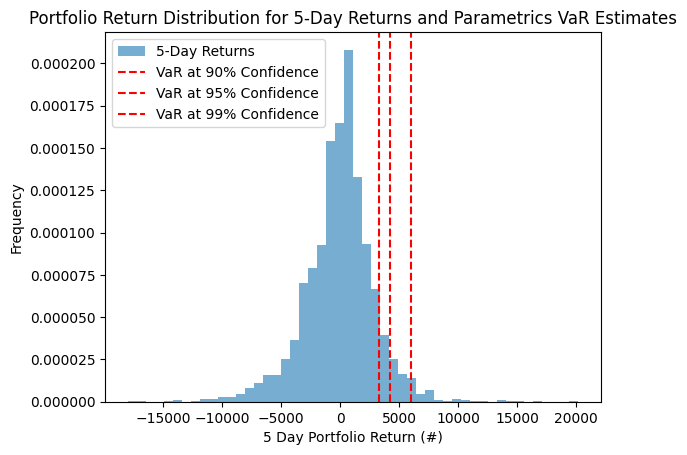

In [ ]:
# Conver returns to naira values for the histogram
historical_x_day_returns_naira = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_naira, bins=50, density=True, alpha=0.6, label=f'{days}-Day Returns')

# Add vertical lines represnting VaR at each confidence level
for cl, VaR in zip(confidence_levels, va_cov_VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days} Day Portfolio Return (#)')
plt.ylabel('Frequency')
plt.title(f'Portfolio Return Distribution for {days}-Day Returns and Parametrics VaR Estimates')
plt.legend()
plt.show()

# USING MONTE-CARLO SIMULATION

In [ ]:
log_returns.head()

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba
Date,,,,,,,,,,
2024-07-16,-0.009132,0.105242,0.002345,-0.046792,0.079137,0.000989,-0.036884,0.000000,-0.015139,-0.036290
2024-07-15,-0.009217,0.000000,0.014723,0.000000,0.000000,-0.001039,0.000000,-0.025318,0.000000,-0.006543
2024-07-12,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003009,-0.005797,-0.051293,0.006757,-0.004386
2024-07-11,0.036368,0.000000,0.074108,0.059285,0.000000,-0.002033,-0.005831,0.001349,0.000000,0.010929
2024-07-10,-0.018019,0.000000,0.000000,0.000000,0.000000,0.003344,0.000000,-0.001349,0.000000,-0.010929


In [ ]:
def expected_return(weights, log_returns):
  return np.sum(log_returns.mean()*weights)

def standard_deviation(weights, cov_matrix):
  variance = weights.T @ cov_matrix @ weights
  return np.sqrt(variance)

## Doing the covarinace matrix

In [ ]:
cov_matrix = log_returns.cov()
print(cov_matrix)

             aiico   dangcem   guiness   jberger    nestle   nse_all  \
aiico     0.001471 -0.000006  0.000066  0.000038  0.000014  0.000054   
dangcem  -0.000006  0.000464  0.000051  0.000011  0.000058  0.000135   
guiness   0.000066  0.000051  0.000754  0.000046  0.000018  0.000049   
jberger   0.000038  0.000011  0.000046  0.000803  0.000026  0.000027   
nestle    0.000014  0.000058  0.000018  0.000026  0.000401  0.000053   
nse_all   0.000054  0.000135  0.000049  0.000027  0.000053  0.000097   
unilever  0.000033  0.000025  0.000056  0.000034  0.000033  0.000040   
zenith    0.000189  0.000069  0.000086  0.000059  0.000051  0.000127   
nb        0.000045  0.000070  0.000063  0.000053  0.000057  0.000097   
uba       0.000189  0.000068  0.000088  0.000049  0.000041  0.000121   

          unilever    zenith        nb       uba  
aiico     0.000033  0.000189  0.000045  0.000189  
dangcem   0.000025  0.000069  0.000070  0.000068  
guiness   0.000056  0.000086  0.000063  0.000088  
jbe

## Create an equally weighted portfolio and find total portfolio expected return

In [ ]:
portfolio_value = 1000000
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_standard_deviation = standard_deviation(weights, cov_matrix)

# Create a function that gives a random Z-score based on normal distribution

In [ ]:
def random_z_score():
  return np.random.normal(0, 1)

## Create a function to calsulate secnarioGainloss

In [ ]:
days = 5
def scenario_gain_loss(portfolio_value, portfolio_standard_deviation, z_score, days):
  return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_standard_deviation * z_score * np.sqrt(days)


## Run 100,000 simulations

In [ ]:
simulations = 100000
scenerioReturn = []
for i in range(simulations):
  z_score = random_z_score()
  scenerioReturn.append(scenario_gain_loss(portfolio_value, portfolio_standard_deviation, z_score, days))

## Specify different confidence interval and calculate the Value at Risk (VaR) the common one is 0.9, 0.95, 0.99

In [ ]:
confidence_levels = [0.9, 0.95, 0.99]
mc_VaRs = []
for cl in confidence_levels:
  VaR = -np.percentile(scenerioReturn, (1 - cl) * 100)
  mc_VaRs.append(VaR)

print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print("-" * 40)
# print each confidence interval and it corresponding VaR
for cl, VaR in zip(confidence_levels, mc_VaRs):
    print(f'{cl * 100:<20} {VaR:<20.2f}')

Confidence Level     Value at Risk       
----------------------------------------
90.0                 33426.18            
95.0                 42857.37            
99.0                 60325.89            


## Plot the results of all 100000 scenarios

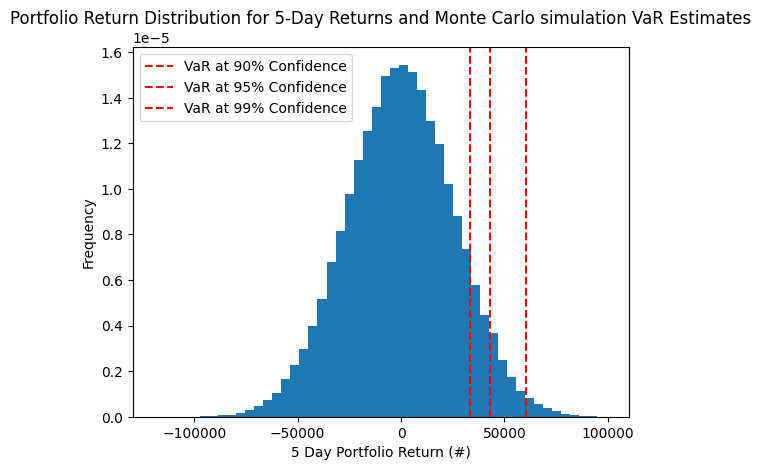

In [ ]:
plt.hist(scenerioReturn, bins=50, density=True)

# Add vertical lines represnting VaR at each confidence level
for cl, VaR in zip(confidence_levels, mc_VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days} Day Portfolio Return (#)')
plt.ylabel('Frequency')
plt.title(f'Portfolio Return Distribution for {days}-Day Returns and Monte Carlo simulation VaR Estimates')
plt.legend()
plt.show()


# USING HISTORICAL METHOD

## calculate the historical portfolio returns

In [ ]:
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2024-07-16    0.004348
2024-07-15   -0.002739
2024-07-12   -0.005773
2024-07-11    0.017418
2024-07-10   -0.002695
                ...   
2015-01-09    0.015111
2015-01-08   -0.003649
2015-01-07    0.019395
2015-01-06    0.056209
2015-01-05    0.057262
Length: 2359, dtype: float64


## find the X day historical returns

In [ ]:
range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2024-07-10    0.010558
2024-07-09    0.008731
2024-07-08    0.019577
2024-07-05    0.020226
2024-07-04    0.010330
                ...   
2015-01-09    0.048528
2015-01-08    0.044377
2015-01-07    0.075130
2015-01-06    0.099781
2015-01-05    0.144328
Length: 2355, dtype: float64


## Specify the confidence interval for the VaR for historical method

In [ ]:
confidence_levels = [0.9, 0.95, 0.99]
range_returns = pd.Series(historical_returns).dropna()
hist_VaRs = []
for cl in confidence_levels:
    VaR = -np.percentile(range_returns, (1 - cl) * 100)*portfolio_value
    hist_VaRs.append(VaR)

print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print("-" * 40)
# print each confidence interval and it corresponding VaR
for cl, VaR in zip(confidence_levels, hist_VaRs):
    print(f'{cl * 100:<20} {VaR:<20.2f}')

Confidence Level     Value at Risk       
----------------------------------------
90.0                 12442.04            
95.0                 18860.06            
99.0                 30827.11            


## Plot the results of the historical returns

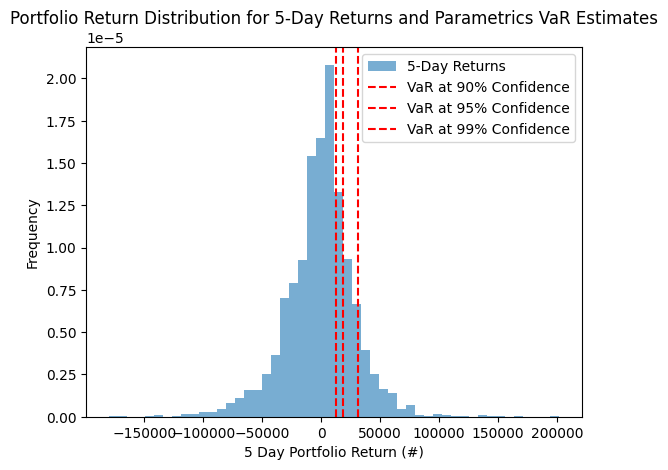

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range = range_returns.dropna()
range_returns_naira = range_returns * portfolio_value

plt.hist(range_returns_naira, bins=50, density=True, alpha=0.6, label=f'{return_window}-Day Returns')
for cl, VaR in zip(confidence_levels, hist_VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days} Day Portfolio Return (#)')
plt.ylabel('Frequency')
plt.title(f'Portfolio Return Distribution for {days}-Day Returns and Parametrics VaR Estimates')
plt.legend()
plt.show()

In [ ]:
directories = os.listdir('/content/value_at_risk_ngx/test_data')
directories

['GUINNES Historical Data (1).csv',
 'NB Historical Data (2).csv',
 'ZENITHB Historical Data (1).csv',
 'UBA Historical Data (1).csv',
 'UNILEVE Historical Data (1).csv',
 'NESTLE Historical Data (1).csv',
 'README.md',
 'JBERGER Historical Data (1).csv',
 'NSE All Share Historical Data.csv',
 'DANGCEM Historical Data (2).csv',
 'AIICO Historical Data (1).csv']

In [ ]:
aiico_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/AIICO Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
dangcem_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/DANGCEM Historical Data (2).csv', parse_dates=['Date'], dayfirst=True)
guiness_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/GUINNES Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
jberger_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/JBERGER Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
nestle_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/NESTLE Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
nse_all_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/NSE All Share Historical Data.csv', parse_dates=['Date'], dayfirst=True)
unilever_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/UNILEVE Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
zenith_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/ZENITHB Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)
nb_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/NB Historical Data (2).csv', parse_dates=['Date'], dayfirst=True)
uba_test_data = pd.read_csv('/content/value_at_risk_ngx/test_data/UBA Historical Data (1).csv', parse_dates=['Date'], dayfirst=True)

In [ ]:
aiico_test_data['aiico'] = aiico_test_data['Price']
aiico_test_data_close = aiico_test_data[['Date', 'aiico']]
dangcem_test_data['dangcem'] = dangcem_test_data['Price']
guiness_test_data['guiness'] = guiness_test_data['Price']
jberger_test_data['jberger'] =  jberger_test_data['Price']
nestle_test_data['nestle'] = nestle_test_data['Price']
nse_all_test_data['nse_all'] = nse_all_test_data['Price']
unilever_test_data['unilever'] = unilever_test_data['Price']
zenith_test_data['zenith'] = zenith_test_data['Price']
nb_test_data['nb'] = nb_test_data['Price']
uba_test_data['uba'] = uba_test_data['Price']
aiico_test_data_close.head()

,Date,aiico
0,2024-09-09,1.13
1,2024-09-06,1.10
2,2024-09-05,1.15
3,2024-09-04,1.17
4,2024-09-03,1.13


In [ ]:
stock_test_close_data = pd.concat([aiico_test_data_close, dangcem_test_data['dangcem'],\
                              guiness_test_data['guiness'], jberger_test_data['jberger'],\
                              nestle_test_data['nestle'], nse_all_test_data['nse_all'],\
                              unilever_test_data['unilever'], zenith_test_data['zenith'],\
                              nb_test_data['nb'],uba_test_data['uba']], axis=1)
stock_test_close_data.set_index('Date', inplace=True)
stock_test_close_data.head()

,aiico,dangcem,guiness,jberger,nestle,nse_all,unilever,zenith,nb,uba
Date,,,,,,,,,,
2024-09-09,1.13,532.0,63.5,153.45,810.0,"96,206.18",18.9,37.0,27.0,23.50
2024-09-06,1.10,532.0,63.5,170.50,810.0,"96,433.53",18.0,37.5,27.0,23.50
2024-09-05,1.15,532.0,63.5,170.50,810.0,"96,210.20",18.0,37.0,26.0,23.40
2024-09-04,1.17,532.0,63.5,170.50,810.0,"96,537.48",18.0,37.4,27.0,23.75
2024-09-03,1.13,532.0,63.5,170.50,810.0,"96,873.74",18.0,38.3,27.0,24.30


In [ ]:
stock_test_close_data.dtypes[stock_test_close_data.dtypes == 'object']
stock_test_close_data.dropna()
# stock_test_close_data['nestle'] = stock_test_close_data['nestle'].str.replace(',', '').astype(float)
stock_test_close_data['nse_all'] = stock_test_close_data['nse_all'].str.replace(',', '').astype(float)
# stock_close_data[['nestle, nse_all']] = stock_close_data[['nestle', 'nse_all']].astype(float)
stock_test_close_data.dtypes

,0
aiico,float64
dangcem,float64
guiness,float64
jberger,float64
nestle,float64
nse_all,float64
unilever,float64
zenith,float64
nb,float64
uba,float64


Getting the log return for the test data test data and using the historical method to get the value at risk at each time

In [ ]:
test_log_returns = np.log(stock_test_close_data / stock_test_close_data.shift(1))
test_log_returns.dropna(inplace=True)
weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
test_historical_returns = (test_log_returns * weights).sum(axis=1)
print(test_historical_returns)

Date
2024-09-06    0.004545
2024-09-05   -0.001329
2024-09-04    0.008398
2024-09-03    0.001536
2024-09-02    0.010189
2024-08-30   -0.006246
2024-08-29   -0.003376
2024-08-28   -0.009596
2024-08-27   -0.015653
2024-08-26   -0.007942
2024-08-23    0.005208
2024-08-22    0.000175
2024-08-21   -0.004576
2024-08-20    0.001392
2024-08-19   -0.001529
2024-08-16    0.017940
2024-08-15    0.001597
2024-08-14   -0.006799
2024-08-13    0.007303
2024-08-12    0.000368
2024-08-09   -0.005731
2024-08-08   -0.032114
2024-08-07   -0.027556
2024-08-06    0.003509
2024-08-05   -0.004097
2024-08-02   -0.008137
2024-08-01   -0.009441
2024-07-31   -0.007052
2024-07-30    0.021166
2024-07-29    0.021773
2024-07-26    0.006806
2024-07-25    0.006851
2024-07-24    0.004996
2024-07-23    0.006859
2024-07-22    0.003231
2024-07-19   -0.004906
2024-07-18    0.005272
dtype: float64


In [ ]:
portfolio_value = 1000000
days = 5
test_range_returns = test_historical_returns.rolling(window=days).sum()
test_range_returns = test_range_returns.dropna()
print(test_range_returns)

Date
2024-09-02    0.023339
2024-08-30    0.012548
2024-08-29    0.010502
2024-08-28   -0.007492
2024-08-27   -0.024682
2024-08-26   -0.042813
2024-08-23   -0.031358
2024-08-22   -0.027808
2024-08-21   -0.022787
2024-08-20   -0.005742
2024-08-19    0.000671
2024-08-16    0.013402
2024-08-15    0.014824
2024-08-14    0.012601
2024-08-13    0.018513
2024-08-12    0.020409
2024-08-09   -0.003262
2024-08-08   -0.036973
2024-08-07   -0.057730
2024-08-06   -0.061524
2024-08-05   -0.065989
2024-08-02   -0.068395
2024-08-01   -0.045722
2024-07-31   -0.025218
2024-07-30   -0.007562
2024-07-29    0.018308
2024-07-26    0.033252
2024-07-25    0.049543
2024-07-24    0.061591
2024-07-23    0.047284
2024-07-22    0.028742
2024-07-19    0.017030
2024-07-18    0.015452
dtype: float64


In [ ]:
confidence_levels = [0.9, 0.95, 0.99]
test_range_returns = pd.Series(test_historical_returns).dropna()
test_VaRs = []
for cl in confidence_levels:
    VaR = -np.percentile(test_range_returns, (1 - cl) * 100)*portfolio_value
    test_VaRs.append(VaR)

print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print("-" * 40)
# print each confidence interval and it corresponding VaR2
for cl, VaR in zip(confidence_levels, test_VaRs):
    print(f'{cl * 100:<20} {VaR:<20.2f}')

Confidence Level     Value at Risk       
----------------------------------------
90.0                 9503.17             
95.0                 18033.46            
99.0                 30472.96            


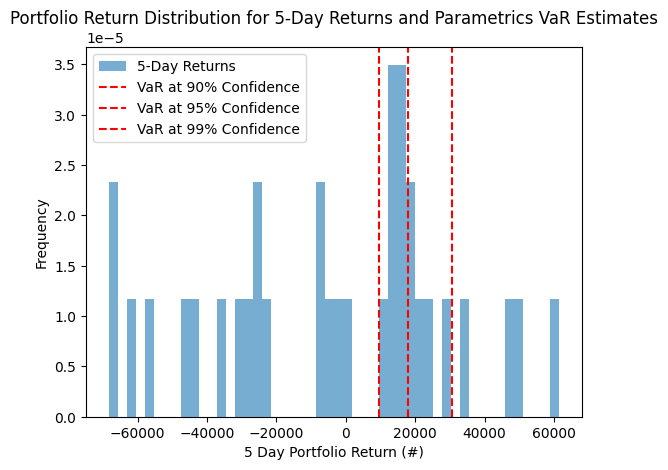

In [ ]:
return_window = days
test_range_returns = test_historical_returns.rolling(window=return_window).sum()
test_range = test_range_returns.dropna()
test_range_returns_naira = test_range_returns * portfolio_value

plt.hist(test_range_returns_naira, bins=50, density=True, alpha=0.6, label=f'{return_window}-Day Returns')
for cl, VaR in zip(confidence_levels, test_VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days} Day Portfolio Return (#)')
plt.ylabel('Frequency')
plt.title(f'Portfolio Return Distribution for {days}-Day Returns and Parametrics VaR Estimates')
plt.legend()
plt.show()

In [ ]:
portfolio_value = 1000000  # Example portfolio value
confidence_interval = 0.95
simulations = 100000

# Lists to store VaR results for each method
hist_VaRs = []
va_cov_VaRs = []
mc_VaRs = []
test_VaRs = []

# Define a function to generate random z-scores for Monte Carlo simulation
def random_z_score():
    return np.random.normal()

# Define a function to simulate gain/loss in a scenario
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * (z_score * portfolio_std_dev * np.sqrt(days / 252))
day =  5
# Loop through days 5 to 30 to calculate VaR for each method
while day <= 30:
    # Historical method VaR
    range_returns = historical_returns.rolling(window=day).sum().dropna()
    hist_VaR = -np.percentile(range_returns, (1 - confidence_interval) * 100) * portfolio_value
    hist_VaRs.append(hist_VaR)

    # Monte Carlo Simulation method VaR
    scenario_return = []
    simulation = 0
    while simulation <= simulations:

        z_score = random_z_score()
        simulated_return = scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, day)
        scenario_return.append(simulated_return)
        simulation += 1
    mc_VaR = -np.percentile(scenario_return, (1 - confidence_interval) * 100)
    mc_VaRs.append(mc_VaR)

    # Variance-Covariance method VaR
    va_cov_VaR = portfolio_value * portfolio_std_dev * norm.ppf(confidence_interval) * np.sqrt(day / 252)
    va_cov_VaRs.append(va_cov_VaR)

    # Real-life dataset VaR (similar to historical)
    test_range_returns = test_historical_returns.rolling(window=day).sum().dropna()
    test_VaR = -np.percentile(test_range_returns, (1 - confidence_interval) * 100) * portfolio_value
    test_VaRs.append(test_VaR)

    day += 1  # Increment day by 5 for the next iteration

# Convert results to numpy arrays for better handling
hist_VaRs = np.array(hist_VaRs)
mc_VaRs = np.array(mc_VaRs)
va_cov_VaRs = np.array(va_cov_VaRs)
test_VaRs = np.array(test_VaRs)

# Print the VaR results
print("Historical VaRs:", hist_VaRs)
print("Monte Carlo VaRs:", mc_VaRs)
print("Variance-Covariance VaRs:", va_cov_VaRs)
print("Real-life Test VaRs:", test_VaRs)


Historical VaRs: [ 52371.13530594  58857.2284848   65336.45335401  70797.60537443
  75028.25390394  83447.06776617  85703.60532253  92233.40869084
  98736.19075496 103148.08598768 108626.78750545 114383.43749485
 115842.25985615 121863.57487566 127939.43320893 129499.07360309
 136835.17815053 145264.10161635 147656.87265936 148593.10036051
 154547.08517087 156884.8971446  158182.41531855 158383.37557353
 160721.9673095  160983.99696193]
Monte Carlo VaRs: [ 42459.93083174  46732.43005312  50449.68211602  53373.57374499
  57625.35795589  60363.14323859  63673.73526675  65976.52186284
  68438.6107395   71007.50189745  73876.53767994  76063.11920198
  78004.99964458  80996.51725384  83296.64093901  85318.22897913
  88038.57743634  89629.53045501  91244.15988761  93169.89342727
  95296.06265987  96942.7062322   99285.24158118 100659.865582
 102705.60078948 104261.01505809]
Variance-Covariance VaRs: [ 42591.16221997  46656.28059648  50394.54274966  53874.03232353
  57142.04037875  60232.9992

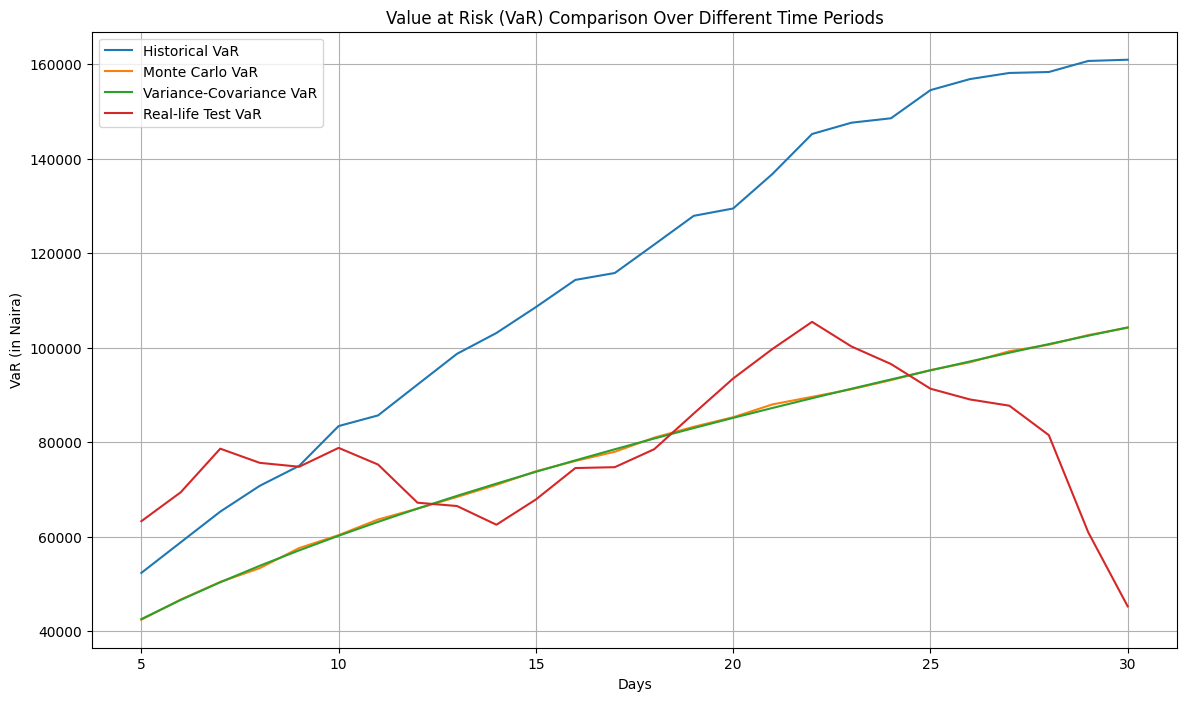

,Historical VaR,Monte Carlo VaR,Variance-Covariance VaR,Real-life Test VaR
5,52371.135306,42459.930832,42591.162220,63310.135958
6,58857.228485,46732.430053,46656.280596,69448.431938
7,65336.453354,50449.682116,50394.542750,78662.644918
8,70797.605374,53373.573745,53874.032324,75664.368752
9,75028.253904,57625.357956,57142.040379,74839.131612


In [ ]:
# Convert results to pandas Series with days as index
days_range = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
hist_VaRs_series = pd.Series(hist_VaRs, index=days_range, name="Historical VaR")
mc_VaRs_series = pd.Series(mc_VaRs, index=days_range, name="Monte Carlo VaR")
va_cov_VaRs_series = pd.Series(va_cov_VaRs, index=days_range, name="Variance-Covariance VaR")
test_VaRs_series = pd.Series(test_VaRs, index=days_range, name="Real-life Test VaR")

# Combine all Series into a DataFrame for easy plotting
var_df = pd.DataFrame({
    "Historical VaR": hist_VaRs_series,
    "Monte Carlo VaR": mc_VaRs_series,
    "Variance-Covariance VaR": va_cov_VaRs_series,
    "Real-life Test VaR": test_VaRs_series
})

# Plot the VaR results
plt.figure(figsize=(14, 8))
plt.plot(var_df)
plt.title("Value at Risk (VaR) Comparison Over Different Time Periods")
plt.xlabel("Days")
plt.ylabel("VaR (in Naira)")
plt.legend(var_df.columns)
plt.grid(True)
plt.show()
var_df.head()

In [ ]:
# Perform t-tests comparing each predicted VaR to the real VaR
t_test_results = {}
for column in ['Historical VaR', 'Monte Carlo VaR', 'Variance-Covariance VaR']:
    t_stat, p_value = stats.ttest_rel(var_df['Real-life Test VaR'], var_df[column])
    t_test_results[column] = (t_stat, p_value)

# Print the t-test results
print(f'{"Method":<20} {"T-Statistic":<20} {"P-Value":<20}')
print("-" * 60)
for method, (t_stat, p_value) in t_test_results.items():
    print(f'{method:<20} {t_stat:<20.4f} {p_value:<20.4f}')
# var_df.to_csv('var_df.csv')

Method               T-Statistic          P-Value             
------------------------------------------------------------
Historical VaR       -5.8802              0.0000              
Monte Carlo VaR      0.2720               0.7879              
Variance-Covariance VaR 0.2822               0.7801              
